<h1 style="color:violet; text-align:center;">Assignment #1</h1>
<h3 style="color:violet; text-align:center;">Shahar Dekel 318864436</h3>
<h3 style="color:violet; text-align:center;">Amit Feiner 316552710</h3>

<h2>1. Choosing The Data</h2>
<br>

We chose the "Logistic Regression - Heart Disease Prediction" dataset.

Link- https://www.kaggle.com/naveengowda16/logistic-regression-heart-disease-prediction

This dataset contains information about the risk factors of heart disease according to the World Health Organisation (WHO). The main reason for this set is for early prognosis of cardiovascular diseases (CVDs), that can aid making  on lifestyle changes decisions for high risk patients and eventually reducing the complications among them.

The dataset contains 4238 instances, 16 columns

We took out 6 unwanted columns- 'prevalentStroke', 'prevalentHyp','totChol','sysBP','diaBP' and 'TenYearCHD'.

Columns description:
1. 'male'- the gender of the patient- male is 1 and female is 0 (binary).
2. 'age'- the patients's age at exam time (continuous).
3. 'education'- the patient's education status- 1 = Some High School, 2 = High School or GED, 3 = Some College or Vocational School, 4 = college (categorial).
4. 'currentSmoker'- is the patient is a smoker?- 0 = nonsmoker, 1 = smoker (binary).
5. 'cigsPerDay'- estimated average on number of cigarettes smoked per day for a patient (continuous).
6. 'BPMeds'- is the patient on blood pressure medications?- 0 = not on blood pressure medications; 1 = on blood pressure medications (binary).
7. 'diabetes'- does the patient have diabetes? 0 = No, 1 = Yes (binary)
8. 'BMI'- Body Mass Index of the patient (weight (kg) / height(meter-squared)) (all unique values).
9. 'heartRate'- the patient's heartrate calculated as beats/minute (continuous).
10. 'glucose'- the patient's level of glucose in his blood, calculated as mg/dL (continuous).

In [5]:
# install packages at first run
#!pip install pandas
#!pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

dataset='framingham_heart_disease.csv'
df=pd.read_csv(dataset, sep=',')
df.columns.values
# removing unwanted columns
df.drop(['prevalentStroke', 'prevalentHyp','totChol','sysBP','diaBP','TenYearCHD'], axis='columns', inplace=True)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,diabetes,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,25.97,66.0,86.0
4234,1,51,3.0,1,43.0,0.0,0,19.71,65.0,68.0
4235,0,48,2.0,1,20.0,NaN,0,22.00,84.0,86.0
4236,0,44,1.0,1,15.0,0.0,0,19.16,86.0,NaN


<h2>2. Descriptive Analysis of The Data</h2>
<br>

<h3>Numeric Variables</h3>

<h3>'age'</h3>

In [45]:
df['age'].describe()

count    4238.000000
mean        0.429212
std         0.495022
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: male, dtype: float64

Missing values: 0


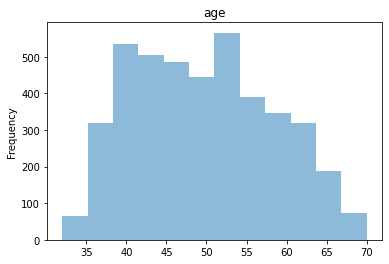

<Figure size 432x288 with 0 Axes>

In [6]:
age = df['age']
age_cnt = len(age)
age = age.dropna()
num_nan = age_cnt-len(age)
print("Missing values:", num_nan)
ax = age.plot.hist(bins=12, alpha=0.5, title = 'age')
plt.show()
plt.clf()
print()


<h3>'cigsPerDay'</h3>

In [44]:
df['cigsPerDay'].describe()

count    4238.000000
mean       49.584946
std         8.572160
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64

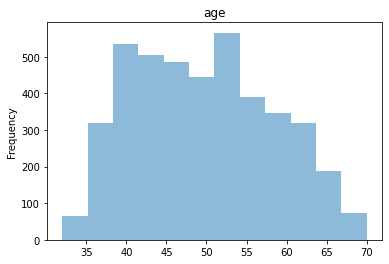

<Figure size 432x288 with 0 Axes>

In [41]:
cigs = df['cigsPerDay']
cigs_cnt = len(cigs)
cigs = cigs.dropna()
num_nan = cigs_cnt-len(cigs)
print("Missing values:", num_nan)
ax = cigs.plot.hist(bins=12, alpha=0.5, title = 'cigsPerDay')
plt.show()
plt.clf()
print()


<h3>'BMI'</h3>

In [7]:
df['BMI'].describe()

count    4219.000000
mean       25.802008
std         4.080111
min        15.540000
25%        23.070000
50%        25.400000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

Missing values: 19


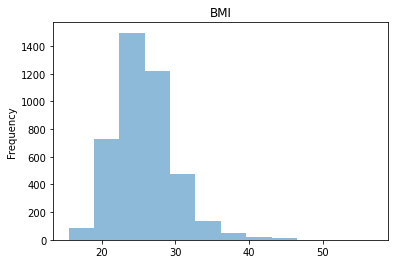

<Figure size 432x288 with 0 Axes>

In [8]:
bmi = df['BMI']
bmi_cnt = len(bmi)
bmi = bmi.dropna()
num_nan = bmi_cnt-len(bmi)
print("Missing values:", num_nan)
ax = bmi.plot.hist(bins=12, alpha=0.5, title = 'BMI')
plt.show()
plt.clf()
print()


<h3>'glucose'</h3>

In [14]:
df['glucose'].describe()

count    3850.000000
mean       81.966753
std        23.959998
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

Missing values: 388


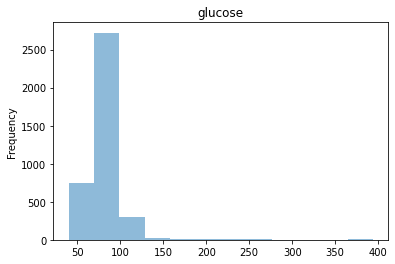

<Figure size 432x288 with 0 Axes>

In [15]:
gluc = df['glucose']
gluc_cnt = len(age)
gluc = gluc.dropna()
num_nan = gluc_cnt-len(gluc)
print("Missing values:", num_nan)
ax = gluc.plot.hist(bins=12, alpha=0.5, title = 'glucose')
plt.show()
plt.clf()
print()


<h3>'heartrate'</h3>

In [16]:
df['heartRate'].describe()

count    4237.000000
mean       75.878924
std        12.026596
min        44.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

Missing values: 1


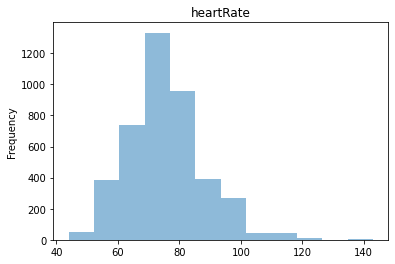

<Figure size 432x288 with 0 Axes>

In [17]:
heart = df['heartRate']
heart_cnt = len(heart)
heart = heart.dropna()
num_nan = heart_cnt-len(heart)
print("Missing values:", num_nan)
ax = heart.plot.hist(bins=12, alpha=0.5, title = 'heartRate')
plt.show()
plt.clf()
print()

<h3>Categorical Variables</h3>
<br>

<h3>'male'</h3>

Missing values: 0
0    2419
1    1819
Name: male, dtype: int64


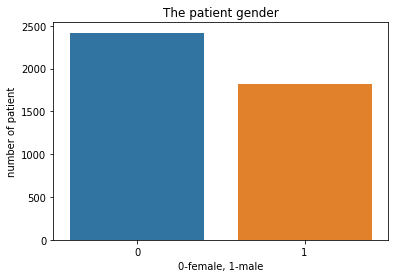

In [21]:
gender = df['male']
gender_len = len(gender)
gender = gender.dropna()
num_nan = gender_len-len(gender)
print("Missing values:", num_nan)
labels = df['male'].value_counts()
print(labels)
ax = sns.barplot(x=labels.index , y=labels)
plt.title('The patient gender')
plt.ylabel('number of patient')
plt.xlabel('0-female, 1-male')
plt.show()

<h3>'currentSmoker'</h3>

Missing values: 0
0    2144
1    2094
Name: currentSmoker, dtype: int64


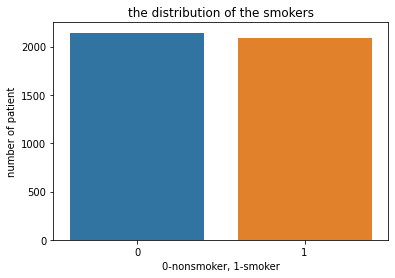

In [22]:
smoke = df['currentSmoker']
smoke_len = len(smoke)
smoke = smoke.dropna()
num_nan = smoke_len-len(smoke)
print("Missing values:", num_nan)
labels = df['currentSmoker'].value_counts()
print(labels)
ax = sns.barplot(x=labels.index , y=labels)
plt.title('the distribution of the smokers')
plt.ylabel('number of patient')
plt.xlabel('0-nonsmoker, 1-smoker')
plt.show()

<h3>'BPMeds'</h3>

0.0    4061
1.0     124
Name: BPMeds, dtype: int64


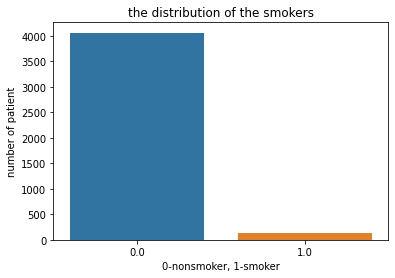

In [54]:
meds = df['BPMeds']
meds_len = len(meds)
meds = meds.dropna()
num_nan = meds_len-len(meds)
print("Missing values:", num_nan)
labels = df['BPMeds'].value_counts()
print(labels)
ax = sns.barplot(x=labels.index , y=labels)
plt.title('the distribution of the patient on blood pressure medication')
plt.ylabel('number of patient')
plt.xlabel('0-nonmedication, 1-medication')
plt.show()

<h3>'diabetes'</h3>

Missing values: 0
0    4129
1     109
Name: diabetes, dtype: int64


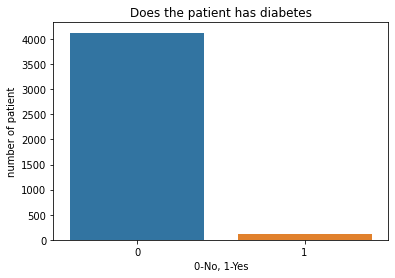

In [12]:
dia = df['diabetes']
dia_len = len(dia)
dia = smoke.dropna()
num_nan = dia_len-len(dia)
print("Missing values:", num_nan)
labels = df['diabetes'].value_counts()
print(labels)
ax = sns.barplot(x=labels.index , y=labels)
plt.title('Does the patient has diabetes')
plt.ylabel('number of patient')
plt.xlabel('0-No, 1-Yes')
plt.show()

<h3>'education'</h3>

Missing values: 0
1.0    1720
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64


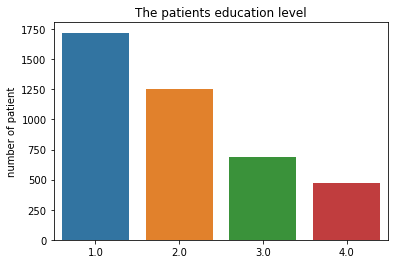

In [13]:
edu = df['education']
edu_len = len(edu)
edu = smoke.dropna()
num_nan = edu_len-len(edu)
print("Missing values:", num_nan)
labels = df['education'].value_counts()
print(labels)
ax = sns.barplot(x=labels.index , y=labels)
plt.title('The patients education level')
plt.ylabel('number of patient')
plt.show()

<h2>3. Formulating Research Questions</h2>
<br>

    1. Does an increase in 'cigsPerDay' lower the 'heartRate'?
    2. Does an increase in 'glucose' level increase the chance of 'BPMeds' to be 1?
    3. Are the values of 'heartRate' different between different levels of 'education'?